# Content
## Unsupervised Learning
### Types
#### Transformations of the dataset
- Applying Data Transformations
    - Dimensionality Reduction
    - Feature Extraction
    - Manifold Learning
##### Most Important Algorithms
- Principal Compenent Analysis (PCA)
- non-negative matrix factorization (NMF): [for Feature Extraction]
- t-SNE : [for visualization using two-dimensional scatter plots]
#### Clustering
### Applications
- exploratory setting
- precprocessing and scaling
### Effect of precprocessing on supervised Learning

## Transformation of the dataset
Unsupervised transformations of a dataset are algorithms that create a new representation of the data which might be easier for humans or other machine learning algorithms to understand compared to the original representation of the data.

### Applications 
- dimensionality reduction, which takes a high-dimensional representation of the data, consisting of many features, and finds a new way to represent this data that summarizes the essential characteristics with fewer features. A common application for dimensionality reduction is reduction to two dimensions for visualization purposes.
- finding the parts or components that “make up” the data. An example of this is topic extraction on collections of text documents. Here, the task is to find the unknown topics that are talked about in each document, and to learn what topics appear in each document.

## Clustering
 partition data into distinct groups of similar items. 

### Challenges in Unsupervised Learning
Unsupervised learning algorithms are usually applied to data that does not contain any label information, so we don’t know what the right output should be 

As a consequence, unsupervised algorithms are used often in an exploratory setting,when a data scientist wants to understand the data better, rather than as part of a larger automatic system.

Another common application for unsupervised algorithms is as a preprocessing step for supervised algorithms. Learning a new representation of the data can sometimes improve the accuracy of supervised algorithms, or can lead to reduced memory and time consumption.

In [1]:
# Importing Used Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn

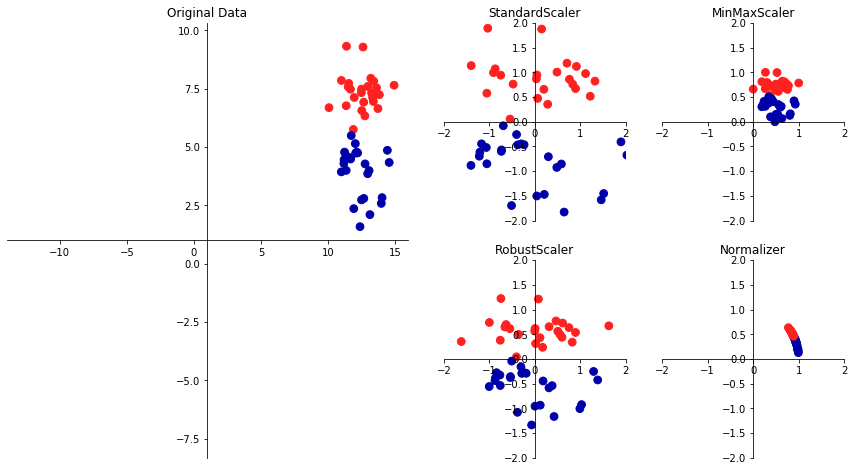

In [2]:
mglearn.plots.plot_scaling()

### The StandardScaler in scikit-learn 
it ensures that for each feature the mean is 0 and the variance is 1, bringing all features to the same magnitude. However, this scaling does not ensure any particular minimum and maximum values for the features.
### thr RobustScaler 
The RobustScaler works similarly to the StandardScaler in
that it ensures statistical properties for each feature that guarantee that they are on the same scale. However, the RobustScaler uses the [median and quartiles], instead of mean and variance. This makes the RobustScaler ignore data points that are very different from the rest (like measurement errors). These odd data points are also called [outliers], and can lead to trouble for other scaling techniques
### MinMaxScaler
The MinMaxScaler, on the other hand, shifts the data such that all features are exactly between 0 and 1. For the two-dimensional dataset this means all of the data is contained.
### Normalizer
the Normalizer does a very different kind of rescaling. It scales each data point such that the feature vector has a [Euclidean length of 1]. In other words, it projects a data point on the circle (or sphere, in the case of higher dimensions) with a radius of 1. This means every data point is scaled by a different number (by the inverse of its length). This normalization is often used when only the direction (or
angle) of the data matters, not the length of the feature vector.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [5]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


### Important 
The scalers always applies exactly the same transformation to the training and the test set. This means the transform method always subtracts the training set minimum and divides by the training set range, which might be different from the minimum and range for the test set.

It is important to apply exactly the same transformation to the training set and the test set for the supervised model to work on the test set.

### What will happen if we used the minimum and range of the test set instead ???

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

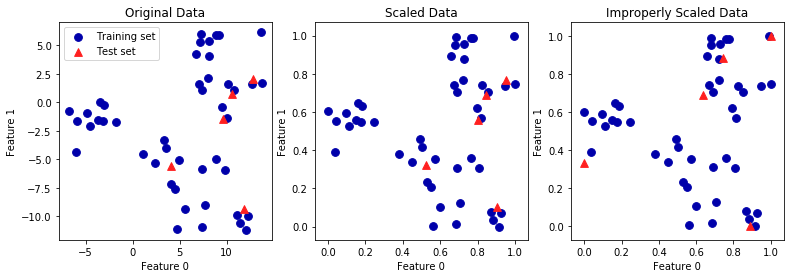

In [6]:
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")
# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")
# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")
for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

In [7]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


In [8]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


In [10]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


## Principal Component Analysis (PCA)
Principal component analysis is a method that rotates the dataset in a way such that the rotated features are statistically uncorrelated. This rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data

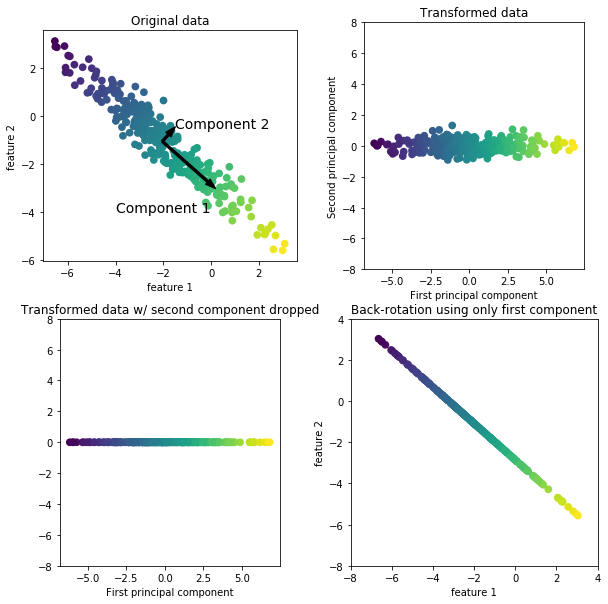

In [11]:
mglearn.plots.plot_pca_illustration()